## 데이터셋

In [3]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

In [4]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.RandomInvert(0.5),
    transforms.Normalize((0.5,), (0.5,)),
])

trainset = datasets.FashionMNIST(
    root='data',
    train = True,
    download = True,
    transform = transform
)

testset = datasets.FashionMNIST(
    root='data',
    train = False,
    download = True,
    transform = transform
)

100%|██████████| 26.4M/26.4M [00:01<00:00, 19.1MB/s]
100%|██████████| 29.5k/29.5k [00:00<00:00, 301kB/s]
100%|██████████| 4.42M/4.42M [00:00<00:00, 5.58MB/s]
100%|██████████| 5.15k/5.15k [00:00<00:00, 9.98MB/s]


In [5]:
train_loader = DataLoader(trainset, batch_size=64, shuffle=True)
test_loader = DataLoader(testset, batch_size=64, shuffle=False)

print(f"학습 샘플 수: {len(trainset)}")
print(f"테스트 샘플 수: {len(testset)}")

학습 샘플 수: 60000
테스트 샘플 수: 10000


In [6]:
trainset.__getitem__(10)

(tensor([[[-1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
           -0.9137,  0.1137,  0.5686, -0.1686, -1.0000, -1.0000, -1.0000,
           -1.0000, -1.0000, -1.0000, -1.0000, -0.3333,  0.4510, -0.1216,
           -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000],
          [-1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,  0.1922,
            0.6784,  0.7020,  0.5216,  0.8510,  0.6941,  0.4667,  0.1686,
            0.0588,  0.2000,  0.6549,  0.7020,  0.8118,  0.6078,  0.7020,
            0.4745, -0.7333, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000],
          [-1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -0.4824,  0.4510,
            0.3020,  0.4118,  0.4196,  0.4902,  0.6549,  0.7333,  0.5451,
            0.1451,  0.5529,  0.6157,  0.4980,  0.3176,  0.4902,  0.3490,
            0.4745,  0.3725, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000],
          [-1.0000, -1.0000, -1.0000, -1.0000, -1.0000,  0.0588,  0.2000,
            0.2549,  0.3725,  0.411

In [7]:
trainset.classes, testset.classes

(['T-shirt/top',
  'Trouser',
  'Pullover',
  'Dress',
  'Coat',
  'Sandal',
  'Shirt',
  'Sneaker',
  'Bag',
  'Ankle boot'],
 ['T-shirt/top',
  'Trouser',
  'Pullover',
  'Dress',
  'Coat',
  'Sandal',
  'Shirt',
  'Sneaker',
  'Bag',
  'Ankle boot'])

In [8]:
class_map ={
    0:'T-shirt/top',
    1:'Trouser',
    2:'Pullover',
    3:'Dress',
    4:'Coat',
    5:'Sandal',
    6:'Shirt',
    7:'Sneaker',
    8:'Bag',
    9:'Ankle boot'
}

In [9]:
loader = DataLoader(
    dataset=trainset,
    batch_size=256,
    shuffle=True
)

imgs, labels = next(iter(loader))
print(imgs.shape, labels.shape)

torch.Size([256, 1, 28, 28]) torch.Size([256])


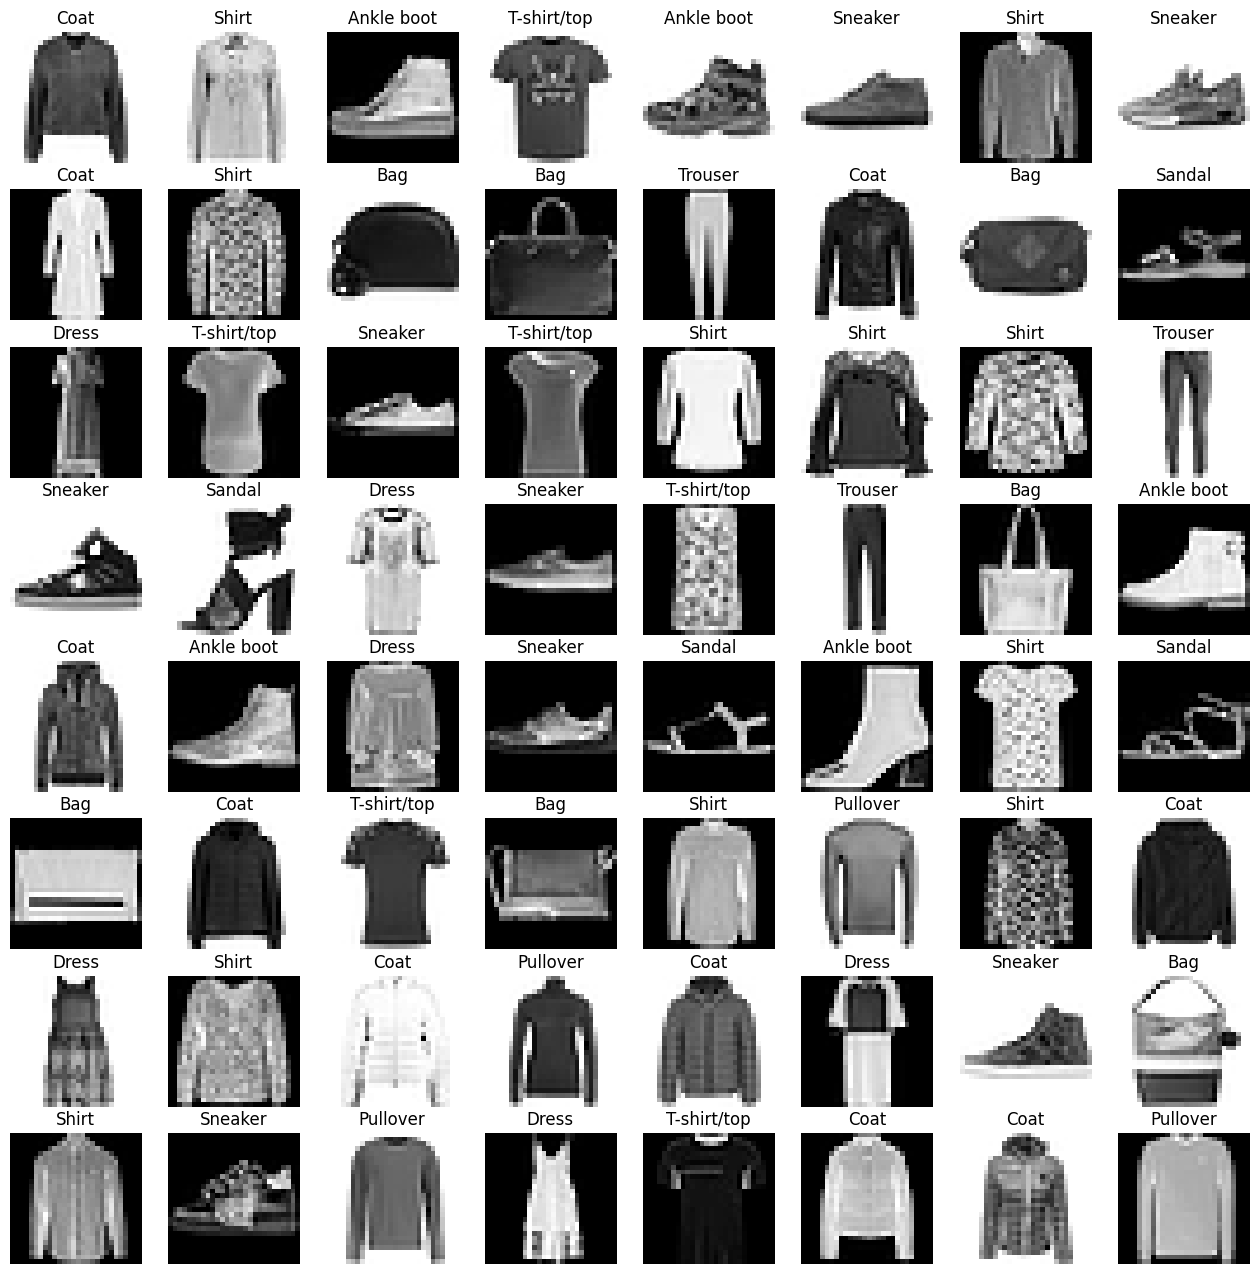

In [10]:
fig, axes = plt.subplots(8,8, figsize=(16,16))

for ax, img, label in zip(axes.flatten(), imgs, labels):
    ax.imshow(img.squeeze(), cmap='gray')
    ax.set_title(class_map[label.item()])
    ax.axis('off')

In [11]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(device)

cuda


## CNN 모델

In [27]:
class ConvNeuralNetwork(nn.Module):
    def __init__(self):
        super(ConvNeuralNetwork, self).__init__()
        self.flatten = nn.Flatten()
        self.classifier = nn.Sequential(
            nn.Conv2d(1, 16, kernel_size=3, padding=1),
            nn.BatchNorm2d(16),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2),
            nn.Dropout(0.15),

            nn.Conv2d(16, 32, kernel_size=3, padding=1),
            nn.BatchNorm2d(32),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2),
            nn.Dropout(0.15),

            nn.Conv2d(32, 64, kernel_size=3, padding=1),
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.MaxPool2d(2),
            nn.Dropout(0.15),
        )
        self.Linear = nn.Linear(64 * 3 * 3, 10)

    def forward(self, x):
        x = self.classifier(x)
        x = self.flatten(x)
        output = self.Linear(x)
        return output

model = ConvNeuralNetwork().to(device)
print(model)

ConvNeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (classifier): Sequential(
    (0): Conv2d(1, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (4): Dropout(p=0.15, inplace=False)
    (5): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (7): ReLU()
    (8): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (9): Dropout(p=0.15, inplace=False)
    (10): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (12): ReLU()
    (13): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (14): Dropout(p=0.15, inplac

In [28]:
loss = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

def train_loop(train_loader, model, loss_fn, optimizer):
    sum_losses = 0
    sum_accs = 0
    for x_batch, y_batch in train_loader:
        x_batch = x_batch.to(device)
        y_batch = y_batch.to(device)
        y_pred = model(x_batch)
        loss = loss_fn(y_pred, y_batch)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        sum_losses = sum_losses + loss

        y_prob = nn.Softmax(1)(y_pred)
        y_pred_index = torch.argmax(y_prob, axis=1)
        acc = (y_batch == y_pred_index).float().sum() / len(y_batch) * 100
        sum_accs = sum_accs + acc

    avg_loss = sum_losses / len(train_loader)
    avg_acc = sum_accs / len(train_loader)
    return avg_loss, avg_acc

In [34]:
epochs = 10
for epoch in range(epochs):
    print("------------------------------------------------")
    avg_loss, avg_acc = train_loop(loader, model, loss, optimizer)
    print(f'Epoch {epoch+1:2d}/{epochs}  Loss: {avg_loss:.6f}  Accuracy: {avg_acc:.2f}%')
print("Done!")

------------------------------------------------
Epoch  1/10  Loss: 0.283646  Accuracy: 89.70%
------------------------------------------------
Epoch  2/10  Loss: 0.263953  Accuracy: 90.48%
------------------------------------------------
Epoch  3/10  Loss: 0.246496  Accuracy: 91.14%
------------------------------------------------
Epoch  4/10  Loss: 0.237097  Accuracy: 91.44%
------------------------------------------------
Epoch  5/10  Loss: 0.225657  Accuracy: 91.84%
------------------------------------------------
Epoch  6/10  Loss: 0.217223  Accuracy: 92.14%
------------------------------------------------
Epoch  7/10  Loss: 0.205888  Accuracy: 92.55%
------------------------------------------------
Epoch  8/10  Loss: 0.202044  Accuracy: 92.65%
------------------------------------------------
Epoch  9/10  Loss: 0.193155  Accuracy: 92.95%
------------------------------------------------
Epoch 10/10  Loss: 0.190234  Accuracy: 93.05%
Done!


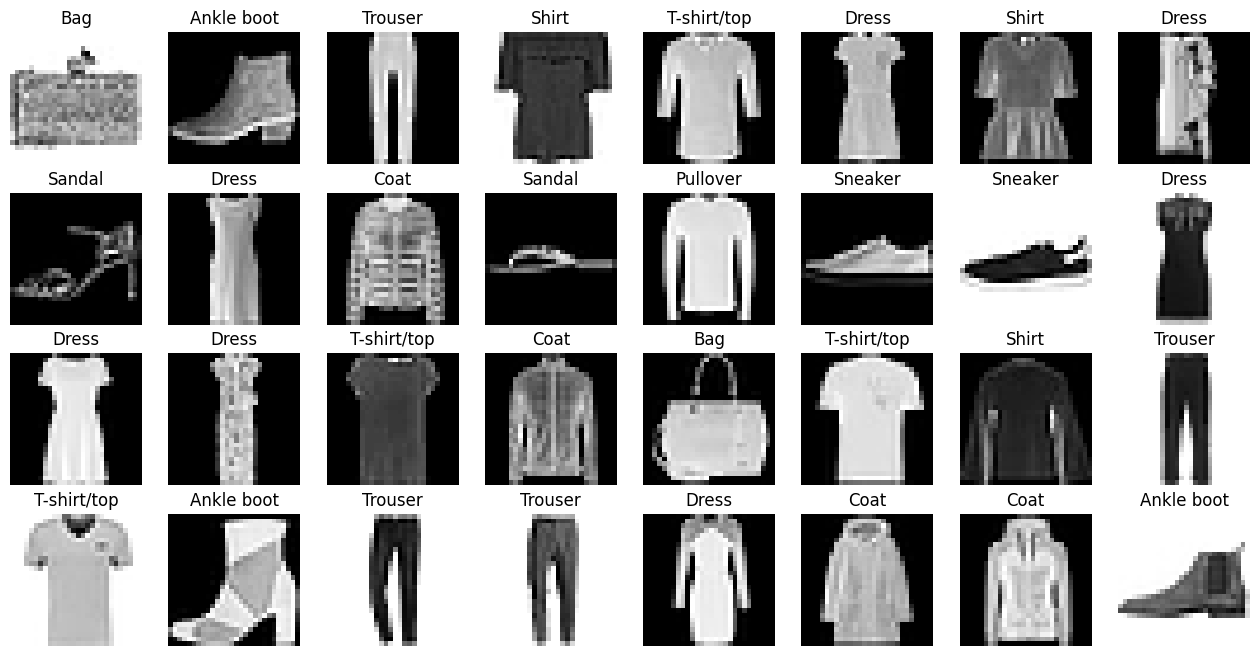

In [35]:
# 테스트 데이터 로드
test_loader = DataLoader(
    dataset=testset,
    batch_size=32,
    shuffle=True
)

imgs, labels = next(iter(test_loader))
fig, axes = plt.subplots(4, 8, figsize=(16, 8))

for ax, img, label in zip(axes.flatten(), imgs, labels):
    ax.imshow(img.reshape(28, 28), cmap='gray')
    ax.set_title(class_map[label.item()])
    ax.axis('off')

In [36]:
def test(model, loader):
    model.eval()

    sum_accs = 0

    img_list = torch.Tensor().to(device)
    y_pred_list = torch.Tensor().to(device)
    y_true_list = torch.Tensor().to(device)

    for x_batch, y_batch in loader:
        x_batch = x_batch.to(device)
        y_batch = y_batch.to(device)

        y_pred = model(x_batch)

        y_prob = nn.Softmax(1)(y_pred)
        y_pred_index = torch.argmax(y_prob, axis=1)

        # cat -> list와 index를 붙인다! dim = 0 행으로 줄줄이 붙인다.
        y_pred_list = torch.cat((y_pred_list, y_pred_index), dim=0)
        y_true_list = torch.cat((y_true_list, y_batch), dim=0)
        img_list = torch.cat((img_list, x_batch), dim=0)

        acc = (y_batch == y_pred_index).float().sum() / len(y_batch) * 100
        sum_accs += acc

    avg_acc = sum_accs / len(loader)
    return y_pred_list, y_true_list, img_list, avg_acc

In [37]:
y_pred_list, y_true_list, img_list, avg_acc = test(model, test_loader)
print(f'테스트 정확도는 {avg_acc:.2f}% 입니다.')

테스트 정확도는 91.15% 입니다.


## 나의 여정
1. 첫번째 시도
    - 모델 조건
        - 수업 내용과 동일
    - 결과 : 과적합때문에 epoch가 안돌아간다.
    - 원인분석 : 8개의 합성곱 레이어는 너무 과한듯하다.

2. 두번째 시도
    - 모델 조건
        - 이미지 사이즈가 28이고 Grayscale 데이터셋임
        - RandomInvert(0.5) 반전 50% 확률로 기
        - 2개의 Conv블록으로 확 줄이기
        - 16 -> 32
        - padding=1
    - 결과 : 에포크 출력이 진짜 너무너무너무 느림..

3. 세번째 시도
    - 모델 조건
        - 위와 동일한 조건으로 batch 사이즈 조정
        batch_size = 256
        - epoch = 5
        - device = cuda
        - 16 -> 32
    - 결과 : 테스트 정확도는 87.81% 입니다.

4. 네번째 시도
    - 모델 조건
        - 위와 동일한 조건으로 batch 사이즈 조정
        batch_size = 256
        - epoch = 5
        - device = cuda
        - 16 -> 32 -> 64
        - 과적합 방지 dropout 1/4
    - 결과 : 테스트 정확도는 86.33% 입니다.
5. 다섯번째 시도
    - 모델 조건
        - 위와 조건 동일
        - Conv 블록안에 nn.BatchNorm2d() 배치 정규화 추가
        - dropout 확률 줄이기 0.25 -> 0.15
    - 결과 : 테스트 정확도는 88.12% 입니다.

6. 여섯번째 시도
    - 모델 조건
        - 진짜 마지막으로 에포크 10으로 증가!!
    - 목표 90% 이상
    - 결과 : 테스트 정확도는 91.15% 입니다. 🔥

## 모델 저장

In [38]:
torch.save(model.state_dict(), 'model_weights.pth')
model2 = ConvNeuralNetwork().to(device)
y_pred_list, y_true_list, img_list, avg_acc = test(model2, test_loader)
print(f'테스트 정확도는 {avg_acc:.2f}% 입니다.')

테스트 정확도는 12.70% 입니다.


In [39]:
model2.load_state_dict(torch.load('model_weights.pth'))

<All keys matched successfully>

## 모델 전체 저장

In [41]:
torch.save(model, 'model.pth')

In [42]:
model3 = torch.load('model.pth', weights_only = False)

In [43]:
y_pred_list, y_true_list, img_list, avg_acc = test(model3, test_loader)
print(f'테스트 정확도는 {avg_acc:.2f}% 입니다.')

테스트 정확도는 90.92% 입니다.


## test 이미지 하나 뽑아오기 vscode 테스트용


In [44]:
from PIL import Image
import numpy as np
from google.colab import files
transform = transforms.Compose([
    transforms.ToTensor(),
])
test_ds = datasets.FashionMNIST(
    root='data',
    train=False,
    download=False,
    transform=transform
)

# 2) 원하는 인덱스의 이미지와 레이블 꺼내기 (예: 0번째)
idx = 0
img_tensor, label = test_ds[idx]        # img_tensor.shape == [1,28,28]
print("Label:", label)

# 3) 텐서를 PIL 이미지로 변환
#    [1,28,28] → (28,28) → [0,255] uint8
arr = (img_tensor.squeeze().numpy() * 255).astype(np.uint8)
pil_img = Image.fromarray(arr, mode='L')

# 4) 파일로 저장
filename = f"fashion_test_{idx}_label_{label}.png"
pil_img.save(filename)
print(f"Saved {filename}")

# 5) 로컬로 다운로드
files.download(filename)

Label: 9
Saved fashion_test_0_label_9.png


/tmp/ipython-input-44-2225206371.py:22: DeprecationWarning: 'mode' parameter is deprecated and will be removed in Pillow 13 (2026-10-15)
  pil_img = Image.fromarray(arr, mode='L')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>